In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import numpy as np
import pandas as pd

import matplotlib as mat
import matplotlib.pyplot as plt
mat.style.use('ggplot')

from src.pricer.black_scholes_pricer import*
%load_ext autoreload
%autoreload 2
%matplotlib inline

Confirm that the vega of an OTM option converges towards the vega exposure found at the peak (ATM) as vols increase. 

In [2]:
rf = 0.01
T = 365
S = np.array([100])
X = np.array([100])
v = 0.20
d = 0.0
t = 100
op_type = "call"
atm_cpricer = BSPricer(rf,T)
c = atm_cpricer.price(S, X, v, d, t, op_type, True)
c

array([ 4.30692698])

In [3]:
print("Vega of an ATM call: {}".format(atm_cpricer.vega))
# We should see the OTM vega exposure converge towards ATM vega exposure as vols increase.


Vega of an ATM call: [ 0.20817331]


In [4]:
rf = 0.01
T = 365
S = np.array([100])
X = np.array([110])
v = 0.20
d = 0.0
t = 100
op_type = "call"
otm_cpricer = BSPricer(rf,T)
c = otm_cpricer.price(S, X, v, d, t, op_type, True)
c

array([ 1.13231248])

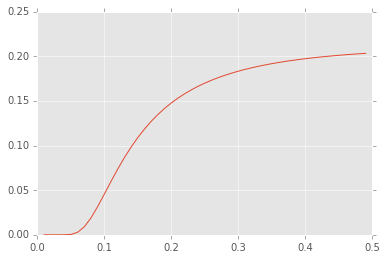

In [5]:
vols = (np.arange(1,50)/100.)
vegas = []
for vol in vols:
    otm_cpricer.price(S, X, vol, d, t, op_type, True)
    vegas.append(otm_cpricer.vega[0])

    
plt.plot(vols,vegas)

DvegaDvol, Volga, Vomma, is the slope of the above plot. We can see that slope is steepest between 0.05 and .20 and starts to flatten out. We can also see that the slope is mostly positive, while flat for low vol levels. Intuitively this make sense as well, as if hypothetically vols go to infinity, all strikes will be effectively ATM, thus the ATM vega acting as an upperbound is acceptable.